In [324]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mticker
from uncertainties import ufloat
from uncertainties.umath import *
import astropy.units as u


In [325]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('seaborn-dark-palette')

/tmp/ipykernel_859/1667230561.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


In [326]:
plt.rcParams["figure.figsize"]=8,6
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.family': 'serif'})

## Datos

In [327]:
#exoplanets = pd.read_csv('./data/exoplanetas_julio_22.csv')
exoplanets_rmp = pd.read_csv('./data/exoplanets_rmp_sep10_23.csv') # with P, M and R determined
exoplanets = pd.read_csv('./data/exoplanets_sep10_23.csv') # all, uso esta porque comprobé que filtrando por P, M y R no se pierde nada

In [328]:
# nuestros planetas
radio_1199 = [0.938*u.R_jup, 0.033*u.R_jup]
radio_1273 = [1.055*u.R_jup, 0.195*u.R_jup]
masa_1199 = [0.233*u.M_jup, 0.018*u.M_jup]
masa_1273 = [0.216*u.M_jup, 0.013*u.M_jup]

In [329]:
print(len(exoplanets))
print(len(exoplanets_rmp))

5514
1111


In [330]:
exoplanets.columns

Index(['pl_name', 'default_flag', 'soltype', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_masselim',
       'pl_massj', 'pl_massjerr1', 'pl_massjerr2', 'pl_massjlim',
       'pl_bmassprov', 'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_denslim',
       'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt',
       'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'pl_orbincl', 'pl_orbinclerr1',
       'pl_orbinclerr2', 'pl_orbincllim', 'pl_imppar', 'pl_impparerr1',
       'pl_impparerr2', 'pl_impparlim', 'st_teff', 'st_tefferr1',
       'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2',
       'st_radlim', 'st_mass', 'st_mas

In [331]:
parecidos = exoplanets[exoplanets.pl_orbper >= 1.0]
parecidos = parecidos[parecidos.pl_orbper <= 10.0]
parecidos = parecidos[parecidos.pl_masse >= 60.0]
parecidos = parecidos[parecidos.pl_masse <= 100.0]
parecidos = parecidos[parecidos.pl_masseerr1/parecidos.pl_masse <= 0.20]
parecidos = parecidos[parecidos.pl_masseerr2/parecidos.pl_masse >= -0.20]
parecidos = parecidos[parecidos.pl_radeerr1/parecidos.pl_rade <= 0.20]
parecidos = parecidos[parecidos.pl_radeerr2/parecidos.pl_rade >= -0.20]
parecidos.shape

(28, 90)

In [332]:
# count how many objets have pl_dens<0.5 and pl_rade<11.5

sum((exoplanets_rmp.pl_dens<0.5) & (exoplanets_rmp.pl_rade <11.5))



48

In [333]:
masas = np.linspace(50,110, 1000)
densidades=np.asarray([0.1,0.5,1.0,1.5,2.0, 1000])
cambio_de_unid = 1/0.01747765891
densidades = densidades*cambio_de_unid
radios1 = (3/(4*np.pi)*masas/densidades[0])**(1/3)
radios2 = (3/(4*np.pi)*masas/densidades[1])**(1/3)
radios3 = (3/(4*np.pi)*masas/densidades[2])**(1/3)
radios4 = (3/(4*np.pi)*masas/densidades[3])**(1/3)
radios5 = (3/(4*np.pi)*masas/densidades[4])**(1/3)
radios6 = (3/(4*np.pi)*masas/densidades[5])**(1/3)


In [334]:
#OTEGI 2020 M-R relation
def r_otegi(m):
    rr = ufloat(0.70, 0.11)
    constant = ufloat(0.63,0.04)
    rotegi = rr*m**(constant)*u.R_earth.to(u.R_jup)
    return rotegi
radios7 = []
radios7err = []
for i in range(len(masas)):
    radios7.append(r_otegi(masas[i]).n)
    radios7err.append(r_otegi(masas[i]).s)

def m_otegi(r):
    mm = ufloat(1.74, 0.38)
    constant = ufloat(1.58,0.10)
    m_ote = mm*(r*u.R_jup.to(u.R_earth))**(constant)
    return m_ote
radios = np.linspace(0.1,2,100)
masas7 = []
masas7err = []
for i in range(len(radios)):
    masas7.append(m_otegi(radios[i]).n)
    masas7err.append(m_otegi(radios[i]).s)


/tmp/ipykernel_859/348452280.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='pl_masse', y='pl_radj', data=parecidos, s=90, palette="ch:s=.25,rot=-.25")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


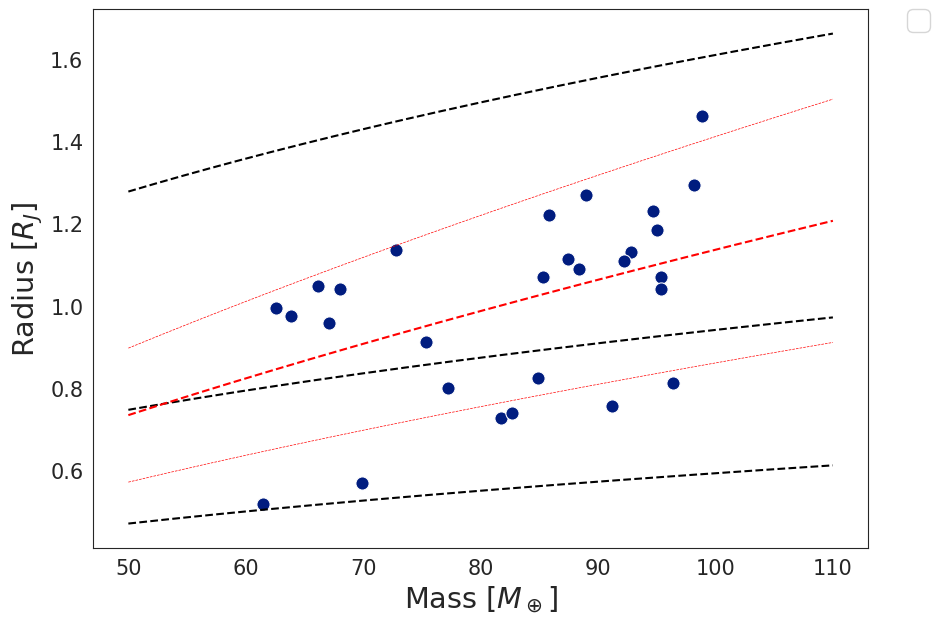

In [335]:
figure = plt.figure(figsize=(10, 7))
sns.set_style("white")
sns.scatterplot(x='pl_masse', y='pl_radj', data=parecidos, s=90, palette="ch:s=.25,rot=-.25")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='xx-large')
plt.xlabel('Mass [$M_\oplus$]', fontsize='xx-large')
plt.ylabel('Radius [$R_J$]', fontsize='xx-large')

plt.plot(masas, radios1, color='black', label='Density = 0.1', linestyle="--")
plt.plot(masas, radios2, color='black', label='Density = 0.5', linestyle="--")
plt.plot(masas, radios7, color='red', label='Otegi M-R relation', linestyle="--")
plt.plot(masas, np.asarray(radios7)-np.asarray(radios7err), color='red', linestyle="--", lw=0.5)
plt.plot(masas, np.asarray(radios7)+np.asarray(radios7err), color='red', linestyle="--", lw=0.5)
#plt.plot(masas,radios3, color='red', label='Density = 100')
#plt.plot(masas,radios4, color='black', label='Density = 1.5')
plt.plot(masas,radios5, color='black', label='Density = 2.0', linestyle="--")
#plt.plot(masas,radios6, color='red', label='Density = 5')
# plt.xlim(60,100)
#plt.ylim(0.1,1.5)
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=15)

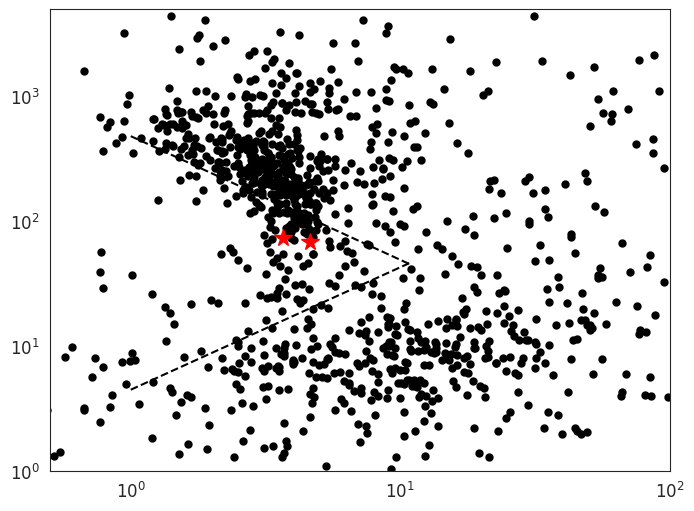

In [336]:
def des1(x):
    return 0.98*x-1.85
def des2(x):
    return -0.99*x+0.18
x=np.linspace(1,11,200)

plt.plot(exoplanets['pl_orbper'], exoplanets['pl_masse'], 'o', color='black', markersize=5)
plt.plot(x, 10**des1(np.log10(x))*317.907, color='black', linestyle='--')
plt.plot(x, 10**des2(np.log10(x))*317.907, color='black', linestyle='--')
plt.plot([3.67], [masa_1199[0].to(u.M_earth).value], marker='*', ms=13, color='red', label='1273')
plt.plot([4.63], [masa_1273[0].to(u.M_earth).value], marker='*', ms=13, color='red', label='1273')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.5,100)
plt.ylim(1,5000)
plt.show()

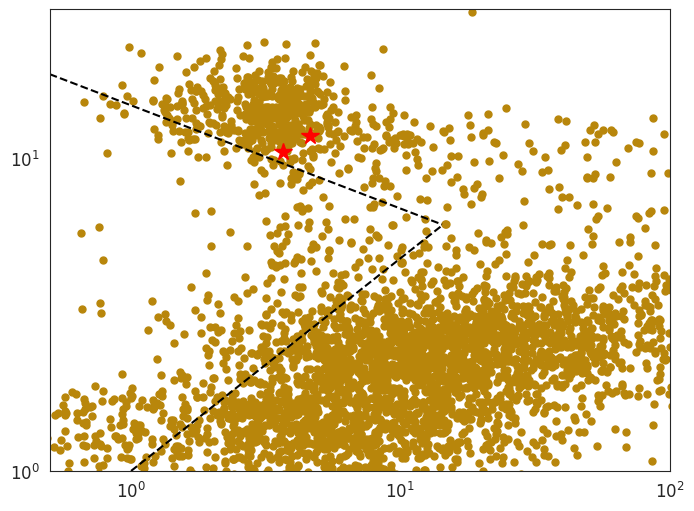

In [337]:
#neptunian desert in Period radius diagram
def des3(x):
    return -0.33*x+1.17
def des4(x):
    return 0.68*x
x=np.linspace(0.5,14.3,200)

plt.plot(exoplanets['pl_orbper'], exoplanets['pl_rade'], 'o', color='C4', markersize=5)
plt.plot(x, 10**des3(np.log10(x)), color='black', linestyle='--')
plt.plot(x, 10**des4(np.log10(x)), color='black', linestyle='--')
plt.plot([3.67], [radio_1199[0].to(u.R_earth).value], marker='*', ms=13, color='red', label='1273')
plt.plot([4.63], [radio_1273[0].to(u.R_earth).value], marker='*', ms=13, color='red', label='1273')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.5, 100)
plt.ylim(1, 30)
plt.show()

## Desert

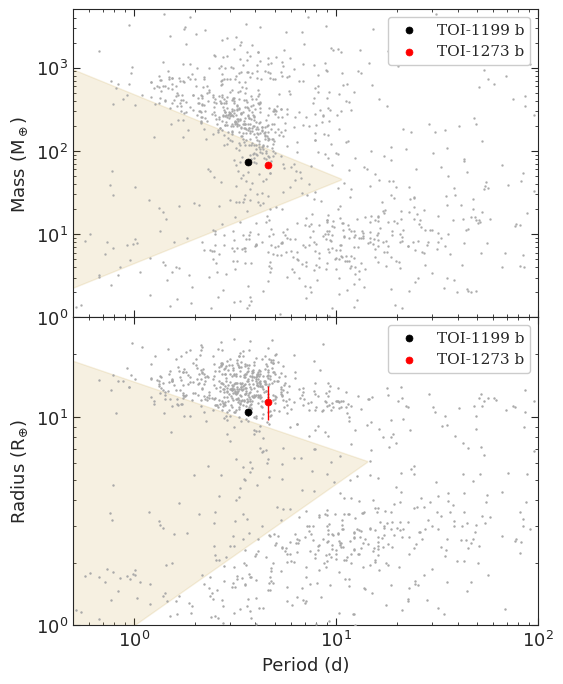

In [338]:
fig, axes = plt.subplots(2, sharex=True, sharey=False, figsize=(6,8))
fig.subplots_adjust(hspace=0)

x1=np.linspace(0.5,10.6,200)
y1=10**des1(np.log10(x1))*317.907
y2=10**des2(np.log10(x1))*317.907

axes[0].plot(exoplanets_rmp['pl_orbper'], exoplanets_rmp['pl_masse'], '.', markerfacecolor='darkgray', color='darkgray', markersize=1.5, alpha=0.9, zorder=9)
axes[0].scatter(3.67, masa_1199[0].to(u.M_earth).value, marker="o", edgecolors='k', linewidths=0.5, s=25, c='k', label='TOI-1199 b', zorder=10) #c='mediumturquoise
axes[0].scatter(4.63, masa_1273[0].to(u.M_earth).value, marker="o", edgecolors='r', linewidths=0.5, s=25, c='r', label='TOI-1273 b', zorder=10) #c='mediumseagreen'
#add errorbars
axes[0].errorbar(3.67, masa_1199[0].to(u.M_earth).value, yerr=masa_1199[1].to(u.M_earth).value, fmt='none', ecolor='k', elinewidth=1, capsize=0, zorder=10)
axes[0].errorbar(4.63, masa_1273[0].to(u.M_earth).value, yerr=masa_1273[1].to(u.M_earth).value, fmt='none', ecolor='r', elinewidth=1, capsize=0, zorder=10)

axes[0].tick_params(axis='y', which='major', size=5, left=True, right=True, direction='in', labelsize=13)
axes[0].tick_params(axis='y', which='minor', size=2, left=True, right=True, direction='in', labelsize=13)
axes[0].tick_params(axis='x', which='major', size=5, bottom=True, top=True, direction='in', labelsize=13)
axes[0].tick_params(axis='x', which='minor', size=2, bottom=True, top=True, direction='in', labelsize=13)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlim(0.5,100)
axes[0].set_ylim(1,5000)
axes[0].set_ylabel('Mass (M$_\oplus$)', fontsize=13)
axes[0].fill_between(x1, y1, y2, color='C4', alpha=0.12)
axes[0].legend(loc='upper right', fontsize=11, framealpha=1, frameon=True,  prop=dict(family='serif', weight='normal', size=11)).set_zorder(11) 

x2=np.linspace(0.5,14.3,200)
y3=10**des3(np.log10(x2))
y4=10**des4(np.log10(x2))
axes[1].plot(exoplanets_rmp['pl_orbper'], exoplanets_rmp['pl_rade'], '.', markerfacecolor='darkgray', color='darkgray', markersize=1.5, alpha=1, zorder=9)
axes[1].scatter(3.67, radio_1199[0].to(u.R_earth).value, marker='o', edgecolors='k', linewidths=0.5, s=25, c='k', label='TOI-1199 b', zorder=10)
axes[1].scatter(4.63, radio_1273[0].to(u.R_earth).value, marker='o', edgecolors='r', linewidths=0.5, s=25, c='r', label='TOI-1273 b', zorder=10)
# add errorbars
axes[1].errorbar(3.67, radio_1199[0].to(u.R_earth).value, yerr=radio_1199[1].to(u.R_earth).value, fmt='none', ecolor='k', elinewidth=1, capsize=0, zorder=10)
axes[1].errorbar(4.63, radio_1273[0].to(u.R_earth).value, yerr=radio_1273[1].to(u.R_earth).value, fmt='none', ecolor='r', elinewidth=1, capsize=0, zorder=10)
axes[1].tick_params(axis='y', which='major', size=5, left=True, right=True, direction='in', labelsize=13)
axes[1].tick_params(axis='y', which='minor', size=2, left=True, right=True, direction='in', labelsize=13)
axes[1].tick_params(axis='x', which='major', size=5, bottom=True, top=True, direction='in', labelsize=13)
axes[1].tick_params(axis='x', which='minor', size=2, bottom=True, top=True, direction='in', labelsize=13)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlim(0.5, 100)
axes[1].set_ylim(1, 30)
axes[1].set_xlabel('Period (d)', fontsize=13)
axes[1].set_ylabel('Radius (R$_{\oplus}$)', fontsize=13)
axes[1].fill_between(x2, y3, y4, color='C4', alpha=0.12)
axes[1].legend(loc='upper right', framealpha=1, frameon=True,  prop=dict(family='serif', weight='normal', size=11)).set_zorder(11) 
#plt.savefig('desert_plot.png', dpi=300, bbox_inches='tight', facecolor='white')

In [339]:
len(exoplanets)

5514

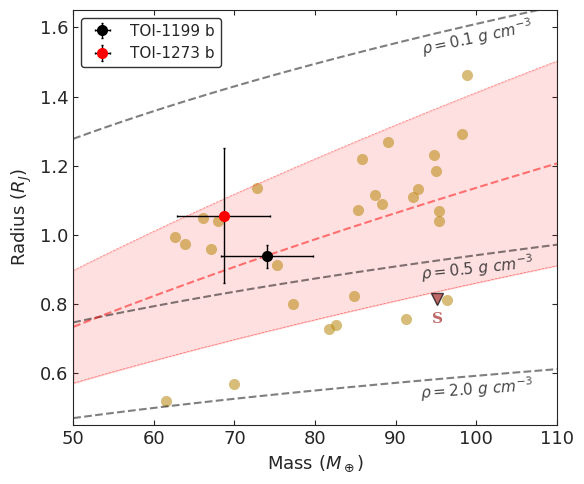

In [340]:
from curses.panel import bottom_panel

plt.figure(figsize=(6, 5))
plt.plot(parecidos['pl_masse'], parecidos['pl_radj'], 'o', color='C4', ms=8, 
        markeredgecolor='k', markeredgewidth=0, alpha=0.55)
plt.xlabel('Mass ($M_\oplus$)', fontsize=13)
plt.ylabel('Radius ($R_J$)', fontsize=13)
plt.plot(masas, radios1, color='black', linewidth=1.5, linestyle="--", alpha=0.5)
plt.plot(masas, radios2, color='black', linewidth=1.5, linestyle="--", alpha=0.5)
plt.plot(masas, radios5, color='black', linewidth=1.5, linestyle="--", alpha=0.5)
plt.plot(masas, radios7, color='red', linewidth=1.5, linestyle="--", alpha=0.5)
plt.plot(masas, np.asarray(radios7)+np.asarray(radios7err), color='red', linewidth=0.5, linestyle="--", alpha=0.5)
plt.plot(masas, np.asarray(radios7)-np.asarray(radios7err), color='red', linewidth=0.5, linestyle="--", alpha=0.5)
plt.fill_between(masas, np.asarray(radios7)-np.asarray(radios7err), np.asarray(radios7)+np.asarray(radios7err), color='red', alpha=0.12)
plt.errorbar([masa_1199[0].to(u.M_earth).value], [radio_1199[0].value], marker='o', ls='none', ms=7, color='k', 
             xerr=[masa_1199[1].to(u.M_earth).value], yerr=[radio_1199[1].value], 
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=1, label='TOI-1199 b')

plt.errorbar([masa_1273[0].to(u.M_earth).value], [radio_1273[0].value], marker='o', ls='none', ms=7, color='r', 
             xerr=[masa_1199[1].to(u.M_earth).value], yerr=[radio_1273[1].value], 
            markeredgecolor='r', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=1, label='TOI-1273 b')

plt.plot([95.16], [0.8145], marker='v', ls='none', ms=8, color='brown', markeredgecolor='k', markeredgewidth=1, alpha=0.7)
plt.text(94.53, 0.745, 'S', fontsize=11, alpha=0.7,  weight='bold', fontfamily='serif', style='normal',  color='brown')

plt.tick_params(axis='both', labelsize=15)
plt.text(93, 1.52, r'$\rho = 0.1 ~g~ cm^{-3}$', fontsize=11, rotation=12, alpha=0.85)
plt.text(93, 0.87, r'$\rho = 0.5 ~g~ cm^{-3}$', fontsize=11, rotation=6, alpha=0.85)
plt.text(93, 0.525, r'$\rho = 2.0 ~g~ cm^{-3}$', fontsize=11, rotation=4, alpha=0.85)

plt.tick_params(axis='y', which='both', left=True, right=True, direction='in', labelsize=13)
plt.tick_params(axis='x', which='both', bottom=True, top=True, direction='in', labelsize=13)
plt.xlim(50,110)
plt.ylim(0.45,1.65)
plt.tight_layout()
plt.legend(loc='upper left', fontsize=11, frameon=True, edgecolor='k', fancybox=True, markerscale=1)
#plt.savefig('density_plot.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [341]:
len(parecidos)

28

# Histogram

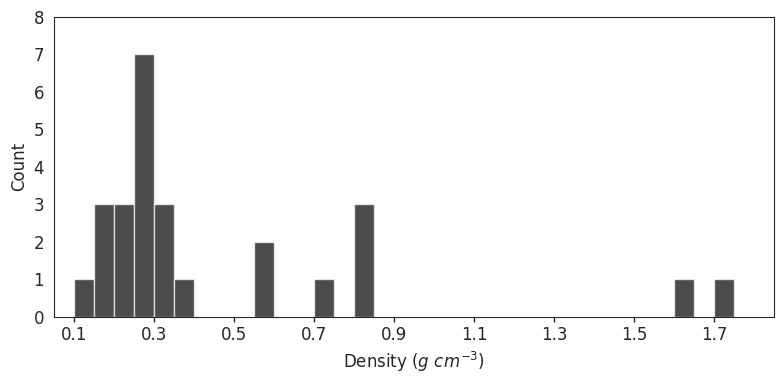

In [342]:
plt.figure(figsize=(8, 4))
plt.hist(parecidos.pl_dens, bins=np.arange(0.0, 1.9, 0.05), histtype='bar', color='k', alpha=0.7) ##8EBA42
plt.xlabel('Density ($g~cm^{-3}$)')
plt.tick_params(axis='both', bottom=True, left=False, direction='out', width=1)
plt.xticks(np.arange(0.1, 1.8, 0.2))
plt.xlim(0.05, 1.85)
#plt.yticks([])
plt.ylim(0, 8)
plt.ylabel('Count')
plt.tight_layout()
#plt.savefig('density_hist.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [343]:
len(parecidos)

28

In [344]:
exoplanets.columns

Index(['pl_name', 'default_flag', 'soltype', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_masselim',
       'pl_massj', 'pl_massjerr1', 'pl_massjerr2', 'pl_massjlim',
       'pl_bmassprov', 'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_denslim',
       'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt',
       'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'pl_orbincl', 'pl_orbinclerr1',
       'pl_orbinclerr2', 'pl_orbincllim', 'pl_imppar', 'pl_impparerr1',
       'pl_impparerr2', 'pl_impparlim', 'st_teff', 'st_tefferr1',
       'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2',
       'st_radlim', 'st_mass', 'st_mas

(0.0, 2.0)

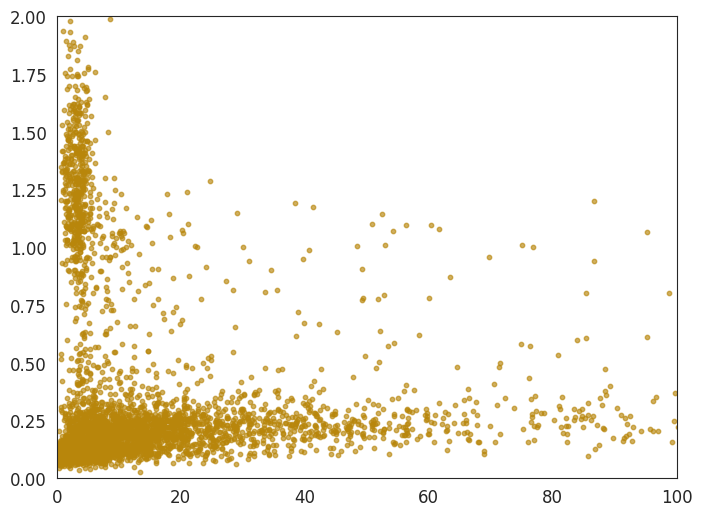

In [345]:
plt.scatter(exoplanets['pl_orbper'], exoplanets['pl_radj'], s=10, color='C4', alpha=0.65)
plt.xlim(0, 100)
plt.ylim(0, 2)

# BIS vs RVs    

In [346]:
data_11 = pd.read_table('./data/rvs/1199_final_rvs.dat', sep='\s+')
data_11.rename(columns={'rv(km/s)': 'rv', 'sigRV(km/s)':'err', 'bis(km/s)': 'bis'}, inplace=True)
y_rv_11 = np.array((data_11.rv-data_11.rv.mean())*1000)
yerr_rv_11 = np.array(data_11.err*1000)

data_12 = pd.read_table('./data/rvs/1273_final_rvs.dat', sep='\s+')
data_12.rename(columns={'rv(km/s)': 'rv', 'sigRV(km/s)':'err', 'bis(km/s)': 'bis'}, inplace=True)
y_rv_12 = np.array((data_12.rv-data_12.rv.mean())*1000)
yerr_rv_12 = np.array(data_12.err*1000)

In [347]:
print(data_11.bjd.min(), data_11.bjd.max())
print(data_12.bjd.min(), data_12.bjd.max())

58856.67683 59749.39015
58887.60797 59787.39647


In [348]:
# pearson coefficients between RVs and BIS
pearson_1199 = np.corrcoef(data_11.bis, data_11.rv)[0,1]
print(pearson_1199)
pearson_1273 = np.corrcoef(data_12.bis, data_12.rv)[0,1]
print(pearson_1273)


-0.028164997529961808
-0.0603499281974863


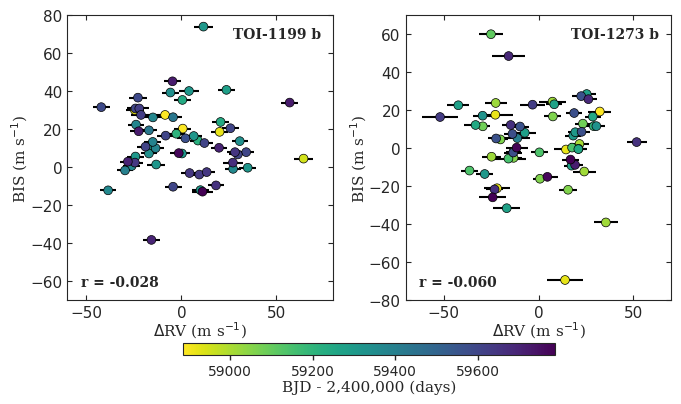

In [349]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 5))
fig.subplots_adjust(wspace=0.20)
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')
g = axes[0].scatter(y_rv_11, data_11.bis*1e3, c=data_11.bjd, cmap='viridis_r', s=40, edgecolors='k', linewidths=0.5, zorder=10, label='TOI-1199 b')
axes[0].errorbar(y_rv_11, data_11.bis*1e3, xerr=yerr_rv_11, fmt='none', ecolor='k', markersize=7, zorder=-10)
axes[0].set_xlabel("$\Delta$RV (m s$^{-1}$)", labelpad=0., fontsize=11, fontfamily='serif')
axes[0].set_ylabel("BIS (m s$^{-1}$)", labelpad=0., fontsize=11, fontfamily='serif')
axes[0].legend(loc='upper right', markerscale=0, frameon=False, prop={'weight':'semibold', 'size':'10', 'family':'serif'})
g = axes[1].scatter(y_rv_12, data_12.bis*1e3, c=data_12.bjd, cmap='viridis_r', s=40, edgecolors='k', linewidths=0.5, zorder=10, label='TOI-1273 b')
axes[1].errorbar(y_rv_12, data_12.bis*1e3, xerr=yerr_rv_12, fmt='none', ecolor='k', markersize=7, zorder=-10)
axes[1].set_xlabel("$\Delta$RV (m s$^{-1}$)", labelpad=0., fontsize=11, fontfamily='serif')
axes[1].set_ylabel("BIS (m s$^{-1}$)", labelpad=0., fontsize=11, fontfamily='serif')
axes[1].legend(loc='upper right', markerscale=0, frameon=False, prop={'weight':'demibold', 'size':'10', 'family':'serif'})
axes[0].tick_params(axis='both', which='both', left=True, bottom=True, top=True, right=True, direction='in', labelsize=11)
axes[1].tick_params(axis='both', which='both', left=True, bottom=True, top=True, right=True, direction='in', labelsize=11)
axes[0].set_xlim(-60, 80)
axes[0].set_ylim(-70, 80)
axes[1].set_xlim(-70, 70)
axes[1].set_ylim(-80, 70)
# show pearson coefficients in the plot at the bottom left
axes[0].text(0.05, 0.05, 'r = {:.3f}'.format(pearson_1199), transform=axes[0].transAxes, fontsize=10, weight='semibold', fontfamily='serif')
axes[1].text(0.05, 0.05, 'r = {:.3f}'.format(pearson_1273), transform=axes[1].transAxes, fontsize=10, weight='semibold', fontfamily='serif')
cbar =fig.colorbar(g, location='bottom', ax=axes.ravel().tolist(), shrink=0.6, aspect=30, pad=0.11)
cbar.ax.tick_params(labelsize=10, width=1)
cbar.set_label(label='BJD - 2,400,000 (days)', fontsize=11, labelpad=0.6, fontfamily='serif')
#plt.savefig('bisrv.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

# TSM

In [350]:
# define a function to calculate the Transmission Spectroscopic Metric according to Kempton et al. 2018
# inputs are Rp(r_earth), Teq, Mp(m_earth), Rstar(rsol), mj

def TSM(Rp, Teq, Mp, Rstar, mj):
    # if any entry is NaN, return NaN
    # if np.isnan(Rp) or np.isnan(Teq) or np.isnan(Mp) or np.isnan(Rstar) or np.isnan(mj):
    #     return np.nan
    scale = 1.15
    return scale * Rp**3 * Teq * 10**(-mj/5) / (Mp * Rstar**2)


In [351]:
Rp_1199 = ufloat(radio_1199[0].to(u.R_earth).value, radio_1199[1].to(u.R_earth).value)
Rp_1273 = ufloat(radio_1273[0].to(u.R_earth).value, radio_1273[1].to(u.R_earth).value)
Mp_1199 = ufloat(masa_1199[0].to(u.M_earth).value, masa_1199[1].to(u.M_earth).value)
Mp_1273 = ufloat(masa_1273[0].to(u.M_earth).value, masa_1273[1].to(u.M_earth).value)

In [352]:
Teq_1199 = ufloat(1492, 29)
Teq_1273 = ufloat(1232, 21)
mj_1199 = ufloat(9.83, 0.02)
mj_1273 = ufloat(9.81, 0.02)
Rstar_1199 = ufloat(1.451, 0.045)
Rstar_1273 = ufloat(1.086, 0.028)
tsm_1199 = TSM(Rp_1199, Teq_1199, Mp_1199, Rstar_1199, mj_1199)
tsm_1273 = TSM(Rp_1273, Teq_1273, Mp_1273, Rstar_1273, mj_1273)
tsm_1273

315.8334923384614+/-177.01600880815676

In [353]:
print('tsm 1199:', tsm_1199)
print('tsm 1273:', tsm_1273)

tsm 1199: 138+/-20
tsm 1273: (3.2+/-1.8)e+02


In [354]:
# define a new column in the dataframe with the TSM
parecidos['tsm_err'] = parecidos.apply(lambda row: TSM(ufloat(row['pl_rade'], row['pl_radeerr1']),
                                                    ufloat(row['pl_eqt'], row['pl_eqterr1']),
                                                    ufloat(row['pl_masse'], row['pl_masseerr1']),
                                                    ufloat(row['st_rad'], row['st_raderr1']), ufloat(row['sy_jmag'], row['sy_jmagerr1']),), axis=1)



In [355]:
parecidos['tsm'] = parecidos.apply(lambda row: TSM(row['pl_rade'], row['pl_eqt'], row['pl_masse'], 
                                                     row['st_rad'], row['sy_jmag']), axis=1)

In [356]:
len(parecidos)

28

In [357]:
# define a function to calculate Teq
def Teq(Teff, Rstar, a):
    if np.isnan(Teff) or np.isnan(Rstar) or np.isnan(a):
        return np.nan
    return Teff*(Rstar*u.R_sun.to(u.au)/a)**(1/2)*(1/4)**(1/4)

In [358]:
tsm_df1 = parecidos[['st_teff', 'st_rad', 'pl_orbsmax', 'pl_masse', 'pl_massj', 'pl_radj', 'tsm', 'pl_eqt']]

In [359]:
tsm_df1['pl_eqt']

116        NaN
318      963.0
326      852.0
327     1010.0
348     1082.0
362     1192.0
425      955.0
427     1025.0
4756    1257.0
4771     952.0
4964     919.0
4970    1562.0
5027       NaN
5034    1038.0
5089    1352.0
5116     690.0
5120     759.0
5173     867.0
5291    1460.0
5305    1404.0
5306       NaN
5317    1119.0
5340    1186.0
5353    1379.0
5354       NaN
5371       NaN
5407       NaN
5424    1120.0
Name: pl_eqt, dtype: float64

In [360]:
# make a dataframe with the pl_bmasse, tsm and pl_eqt, then add two rows with the values of our planets
for k,i in enumerate(tsm_df1['pl_eqt']):
    if np.isnan(i):
        #print(Teq(tsm_df1['st_teff'].iloc[k], tsm_df1['st_rad'].iloc[k], tsm_df1['pl_orbsmax'].iloc[k]))
        tsm_df1['pl_eqt'].iat[k] = Teq(tsm_df1['st_teff'].iloc[k], tsm_df1['st_rad'].iloc[k], tsm_df1['pl_orbsmax'].iloc[k])


/tmp/ipykernel_859/1728358905.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsm_df1['pl_eqt'].iat[k] = Teq(tsm_df1['st_teff'].iloc[k], tsm_df1['st_rad'].iloc[k], tsm_df1['pl_orbsmax'].iloc[k])


In [361]:
tsm_df1['pl_eqt']

116      856.391007
318      963.000000
326      852.000000
327     1010.000000
348     1082.000000
362     1192.000000
425      955.000000
427     1025.000000
4756    1257.000000
4771     952.000000
4964     919.000000
4970    1562.000000
5027    1349.522067
5034    1038.000000
5089    1352.000000
5116     690.000000
5120     759.000000
5173     867.000000
5291    1460.000000
5305    1404.000000
5306     891.526534
5317    1119.000000
5340    1186.000000
5353    1379.000000
5354            NaN
5371    1120.547259
5407            NaN
5424    1120.000000
Name: pl_eqt, dtype: float64

In [362]:
# drop rows with pl_eqt = NaN
tsm_df1 = tsm_df1.dropna(subset=['pl_eqt'])
tsm_df1['pl_eqt']

116      856.391007
318      963.000000
326      852.000000
327     1010.000000
348     1082.000000
362     1192.000000
425      955.000000
427     1025.000000
4756    1257.000000
4771     952.000000
4964     919.000000
4970    1562.000000
5027    1349.522067
5034    1038.000000
5089    1352.000000
5116     690.000000
5120     759.000000
5173     867.000000
5291    1460.000000
5305    1404.000000
5306     891.526534
5317    1119.000000
5340    1186.000000
5353    1379.000000
5371    1120.547259
5424    1120.000000
Name: pl_eqt, dtype: float64

In [376]:
new_row = pd.DataFrame({'pl_masse': masa_1199[0].to(u.M_earth).value, 'pl_massj': masa_1199[0], 'pl_radj': radio_1199[0].value, 'tsm': tsm_1199.n, 'pl_eqt': Teq_1199.n}, index=[0])
tsm_df2 = pd.concat([new_row, tsm_df1.loc[:]]).reset_index(drop=True)
new_row2 = pd.DataFrame({'pl_masse': masa_1273[0].to(u.M_earth).value, 'pl_massj': masa_1273[0],  'pl_radj': radio_1273[0].value, 'tsm': tsm_1273.n, 'pl_eqt': Teq_1273.n}, index=[0])
tsm_df = pd.concat([new_row2, tsm_df2.loc[:]]).reset_index(drop=True)

In [377]:
len(tsm_df)

28

# Plot mass vs radio y mass vs tsm

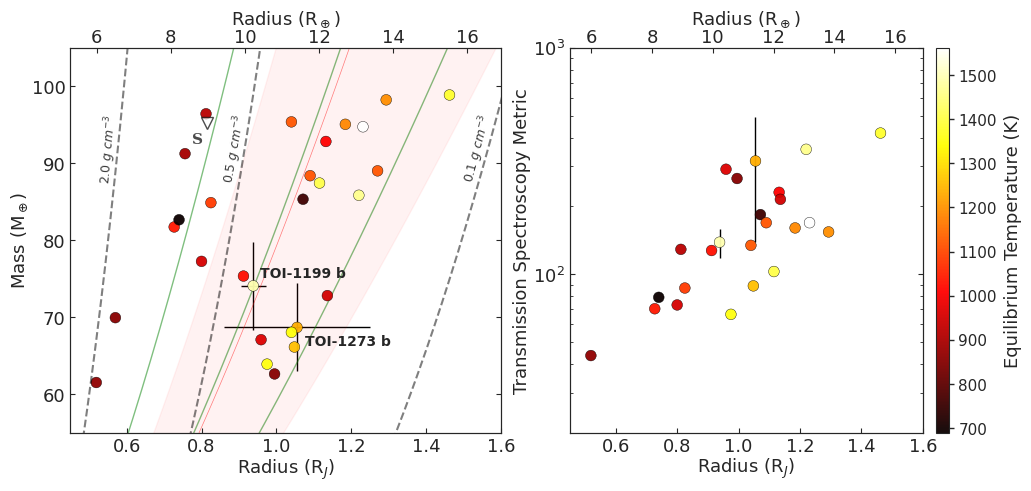

In [378]:
# lets replot the mass vs radius side by side with mass vs tsm
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
fig.subplots_adjust(wspace=0.159)

axes[0].scatter(tsm_df['pl_radj'], tsm_df['pl_masse'], c=tsm_df['pl_eqt'], cmap='hot', s=60, edgecolors='k', linewidths=0.3, alpha=0.95)
axes[0].set_ylabel('Mass (M$_\oplus$)', fontsize=13, labelpad=1)
axes[0].set_xlabel('Radius (R$_{J}$)', fontsize=13, labelpad=1)
axes[0].plot(radios1, masas, color='black', linewidth=1.5, linestyle="--", alpha=0.5)
axes[0].plot(radios2, masas, color='black', linewidth=1.5, linestyle="--", alpha=0.5)
axes[0].plot(radios5, masas, color='black', linewidth=1.5, linestyle="--", alpha=0.5)

axes[0].errorbar([radio_1199[0].value], [masa_1199[0].to(u.M_earth).value], marker='none', ls='none', ms=6, color='darkgray', 
             yerr=[masa_1199[1].to(u.M_earth).value], xerr=[radio_1199[1].value], 
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1199 b', zorder=-5)
axes[0].errorbar([radio_1273[0].value], [masa_1273[0].to(u.M_earth).value], marker='none', ls='none', ms=6, color='darkgray', 
             yerr=[masa_1199[1].to(u.M_earth).value], xerr=[radio_1273[1].value], 
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1273 b', zorder=-5)
axes[0].plot([0.8145], [95.16], marker='v', ls='none', ms=8, color='white', markeredgecolor='k', markeredgewidth=1, alpha=0.7)
axes[0].text(0.775, 92.53, 'S', fontsize=11, alpha=0.7,  weight='bold', fontfamily='serif', style='normal',  color='k')
axes[0].tick_params(axis='y', which='both', left=True, right=True, direction='in', labelsize=13)
axes[0].tick_params(axis='x', which='both', bottom=True, top=True, direction='in', labelsize=13)
axes[0].set_ylim(55,105)
axes[0].set_xlim(0.45,1.6)
axes3 = axes[0].twiny()
axes3.set_xlabel("Radius (R$_\oplus$)", fontsize=13, labelpad=2.5)
axes3.scatter(tsm_df['pl_radj']*11.2089, tsm_df['pl_masse'], s=0, edgecolors='none', alpha=0.01, zorder=10)
axes3.tick_params(axis='both', which='both', left=True, bottom=False, top=True, right=True, direction='in', labelsize=13, pad=1)

axes[0].plot(radios, masas7, color='red', linewidth=0.5, linestyle="-", alpha=0.5, zorder=-1)
axes[0].plot(radios7, masas, color='green', linewidth=1, linestyle="-", alpha=0.5, zorder=-1)
axes[0].plot(radios7+np.asarray(radios7err), masas, color='green', linewidth=1, linestyle="-", alpha=0.5, zorder=-1)
axes[0].plot(radios7-np.asarray(radios7err), masas, color='green', linewidth=1, linestyle="-", alpha=0.5, zorder=-1)
axes[0].fill_between(radios, np.asarray(masas7)-np.asarray(masas7err), np.asarray(masas7)+np.asarray(masas7err), 
                  color='red', alpha=0.05, zorder=-1)

g = axes[1].scatter(tsm_df['pl_radj'], tsm_df['tsm'], c=tsm_df['pl_eqt'], cmap='hot', s=60, edgecolors='k', linewidths=0.3, alpha=0.95, zorder=10)
axes[1].errorbar(radio_1199[0].value, tsm_1199.n, yerr=tsm_1199.s, fmt='none', ecolor='k',
                  elinewidth=1, markersize=7, zorder=-10)
axes[1].errorbar(radio_1273[0].value, tsm_1273.n, yerr=tsm_1273.s, fmt='none', ecolor='k', 
                 elinewidth=1, markersize=7, zorder=-10)

axes[1].set_xlabel("Radius (R$_{J}$)", fontsize=13, labelpad=0.5)
axes[1].set_ylabel("Transmission Spectroscopy Metric", labelpad=1, fontsize=13)
axes[1].yaxis.set_label_position("left")
axes[1].tick_params(axis='both', which='both', left=True, bottom=True, top=False, right=True, direction='in', labelsize=13)
axes[1].set_xlim(0.45,1.6)
axes[1].set_yscale('log')
axes[1].set_ylim(2e1, 1e3)
cbar = fig.colorbar(g, ax=axes[1], location='right', ticklocation='right', aspect=30, pad=0.03) #, location='left
cbar.ax.tick_params(labelsize=11, width=1)
cbar.set_label(label='Equilibrium Temperature (K)', fontsize=13, labelpad=5)

axes2 = axes[1].twiny()
axes2.set_xlabel("Radius (R$_\oplus$)", fontsize=13, labelpad=2.5)
axes2.scatter(tsm_df['pl_radj']*11.2089, tsm_df['tsm'], s=0, edgecolors='none', alpha=0.01, zorder=10)
axes2.tick_params(axis='both', which='both', left=True, bottom=False, top=True, right=True, direction='in', labelsize=13, pad=1)

axes[0].text(0.955, 75.2, 'TOI-1199 b', fontsize=10, weight='bold')
axes[0].text(1.075, 66.3, 'TOI-1273 b', fontsize=10, weight='bold')
axes[0].text(1.49, 88, r'$0.1 ~g~ cm^{-3}$', fontsize=9, rotation=75.25, alpha=0.9)
axes[0].text(0.849, 88, r'$0.5 ~g~ cm^{-3}$', fontsize=9, rotation=80, alpha=0.9)
axes[0].text(0.519, 88, r'$2.0 ~g~ cm^{-3}$', fontsize=9, rotation=85, alpha=0.9)
#plt.savefig('mass_radio_tsm.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [379]:
# fortney 2007, first list is mass in Mjup, second list is radius in Rjup
age300myr_0045_0core = [[0.052, 0.087, 0.15, 0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [2.795, 1.522, 1.345, 1.255, 1.240, 1.228, 1.212, 1.206, 1.199, 1.210, 1.203, 1.170]]
age300myr_0045_10core = [[0.052, 0.087, 0.15, 0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.801, 1.012, 1.091, 1.124, 1.168, 1.185, 1.185, 1.188, 1.188, 1.204, 1.199, 1.168]]
age300myr_0045_25core = [[0.087, 0.15, 0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.447, 0.793, 0.968, 1.071, 1.124, 1.147, 1.161, 1.173, 1.195, 1.193, 1.164]]
age300myr_0045_50core = [[0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.719, 0.921, 1.033, 1.084, 1.119, 1.148, 1.179, 1.183, 1.157]]
age300myr_0045_100core = [[0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.627, 0.863, 0.968, 1.036, 1.101, 1.148, 1.163, 1.146]]

age1gyr_0045_0core = [[0.052, 0.087, 0.15, 0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [1.490, 1.271, 1.183, 1.144, 1.163, 1.167, 1.160, 1.157, 1.156, 1.164, 1.149, 1.107]]
age1gyr_0045_10core = [[0.052, 0.087, 0.15, 0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.698, 0.888, 0.975, 1.043, 1.099, 1.127, 1.134, 1.140, 1.147, 1.158, 1.145, 1.105]]
age1gyr_0045_25core = [[0.087, 0.15, 0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.426, 0.739, 0.908, 1.012, 1.072, 1.099, 1.115, 1.132, 1.149, 1.140, 1.101]]
age1gyr_0045_50core = [[0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.684, 0.877, 0.988, 1.041, 1.077, 1.109, 1.134, 1.130, 1.095]]
age1gyr_0045_100core = [[0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.607, 0.831, 0.932, 0.999, 1.065, 1.105, 1.111, 1.084]]

age45gyr_0045_0core = [[0.052, 0.087, 0.15, 0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [1.103, 1.065, 1.038, 1.049, 1.086, 1.105, 1.107, 1.108, 1.113, 1.118, 1.099, 1.053]]
age45gyr_0045_10core = [[0.052, 0.087, 0.15, 0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.599, 0.775, 0.878, 0.964, 1.029, 1.069, 1.083, 1.092, 1.104, 1.112, 1.095, 1.050]]
age45gyr_0045_25core = [[0.087, 0.15, 0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.403, 0.686, 0.846, 0.952, 1.019, 1.050, 1.069, 1.090, 1.104, 1.090, 1.047]]
age45gyr_0045_50core = [[0.24, 0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.648, 0.831, 0.942, 0.996, 1.033, 1.068, 1.090, 1.081, 1.042]]
age45gyr_0045_100core = [[0.41, 0.68, 1.0, 1.46, 2.44, 4.1, 6.8, 11.3],
                        [0.587, 0.798, 0.896, 0.961, 1.026, 1.062, 1.063, 1.032]]

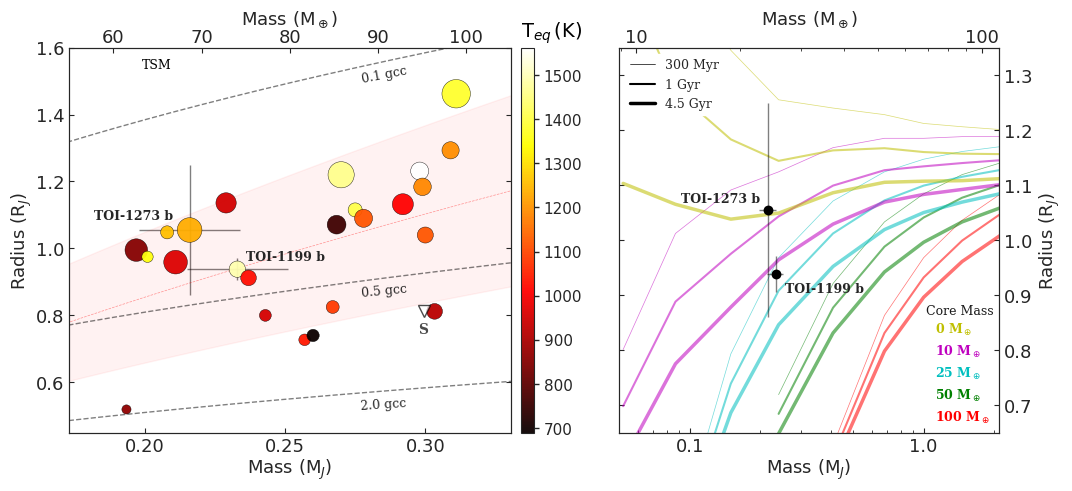

In [411]:
# lets replot the mass vs radius side by side with mass vs tsm
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), gridspec_kw={"width_ratios":[1.4,1]})
fig.subplots_adjust(wspace=0.04)
g = axes[0].scatter(tsm_df['pl_massj'], tsm_df['pl_radj'], c=tsm_df['pl_eqt'], 
                    cmap='hot', s=tsm_df['tsm'], edgecolors='k', linewidths=0.3, alpha=0.95)
                    
axes[0].set_xlabel('Mass (M$_{J}$)', fontsize=13, labelpad=1)
axes[0].set_ylabel('Radius (R$_{J}$)', fontsize=13, labelpad=1)
axes[0].plot(masas*u.M_earth.to(u.M_jup), radios1, color='black', linewidth=1, linestyle="--", alpha=0.5)
axes[0].plot(masas*u.M_earth.to(u.M_jup), radios2, color='black', linewidth=1, linestyle="--", alpha=0.5)
axes[0].plot(masas*u.M_earth.to(u.M_jup), radios5, color='black', linewidth=1, linestyle="--", alpha=0.5)
axes[0].plot(masas*u.M_earth.to(u.M_jup), radios7, color='red', linewidth=0.5, linestyle="--", alpha=0.4, zorder=-1)
axes[0].set_xlim(55*u.M_earth.to(u.M_jup), 105*u.M_earth.to(u.M_jup))
axes[0].set_xticks([0.20, 0.25, 0.30])
axes[0].fill_between(masas*u.M_earth.to(u.M_jup), np.asarray(radios7)-np.asarray(radios7err), np.asarray(radios7)+np.asarray(radios7err), 
                  color='red', alpha=0.05, zorder=-1)
axes[0].errorbar([masa_1199[0].value], [radio_1199[0].value], marker='none', ls='none', ms=6, color='darkgray', 
             xerr=[masa_1199[1].value], yerr=[radio_1199[1].value], alpha=0.5,
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1199 b', zorder=-5)
axes[0].errorbar([masa_1273[0].value], [radio_1273[0].value], marker='none', ls='none', ms=6, color='darkgray', 
             xerr=[masa_1199[1].value], yerr=[radio_1273[1].value], alpha=0.5,
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1273 b', zorder=-5)
axes[0].plot([95.16*u.M_earth.to(u.M_jup)], [0.8145], marker='v', ls='none', ms=8, color='white', markeredgecolor='k', markeredgewidth=1, alpha=0.7)
axes[0].text(94.50*u.M_earth.to(u.M_jup), 0.745, 'S', fontsize=10, alpha=0.7,  weight='bold', fontfamily='serif',  color='k')
axes[0].tick_params(axis='y', which='both', left=True, right=True, direction='in', labelsize=13)
axes[0].tick_params(axis='x', which='both', bottom=True, top=True, direction='in', labelsize=13)
axes3 = axes[0].twiny()
axes3.set_xlabel("Mass (M$_\oplus$)", fontsize=13, labelpad=2.5)
axes3.scatter(tsm_df1['pl_radj']*u.M_earth.to(u.M_jup), tsm_df1['pl_masse'], s=0, edgecolors='none', alpha=0.01, zorder=10)
axes3.tick_params(axis='both', which='both', left=True, bottom=False, top=True, right=True, direction='in', labelsize=13, pad=1)
cbar = fig.colorbar(g, ax=axes[0], aspect=30, pad=0.02) #, location='left
cbar.ax.tick_params(labelsize=11, width=1)
#cbar.set_label(label='Equilibrium Temperature', fontsize=13, labelpad=5)
axes3.set_ylim(0.45,1.6)
axes3.set_xlim(55, 105)
axes3.text(75, 0.965, 'TOI-1199 b', fontsize=9, weight='bold', fontfamily='serif')
axes3.text(57.8, 1.088, 'TOI-1273 b', fontsize=9, weight='bold', fontfamily='serif')
axes3.text(88, 1.495, '0.1 gcc', fontsize=9, rotation=11., alpha=0.85, fontfamily='serif', color='k')
axes3.text(88, 0.857, '0.5 gcc', fontsize=9, rotation=5.5, alpha=0.85, fontfamily='serif', color='k')
axes3.text(88, 0.52, '2.0 gcc', fontsize=9, rotation=3.8, alpha=0.85, fontfamily='serif', color='k')
kw = dict(prop="sizes", num=4, color='k')
legend1 = axes[0].legend(*g.legend_elements(**kw), prop=dict(family='serif', size=9), frameon=True, edgecolor='w',
                    loc="upper left", fontsize=9, title_fontsize=9, framealpha=0.8, 
                    borderpad=0.3, labelspacing=1.2, handletextpad=0.3, borderaxespad=0.5)
axes[0].add_artist(legend1)
axes[0].text(0.199, 1.5392, 'TSM', fontsize=9, weight='normal', fontfamily='serif', color='k')

lws = [0.5,1.5,2.5]
colors = ['y', 'm', 'c', 'g', 'r']
alphas = 0.55

axes[1].plot(age300myr_0045_0core[0], age300myr_0045_0core[1], color=colors[0], linewidth=lws[0], linestyle="-", alpha=alphas)
axes[1].plot(age300myr_0045_10core[0], age300myr_0045_10core[1], color=colors[1], linewidth=lws[0], linestyle="-", alpha=alphas)
axes[1].plot(age300myr_0045_25core[0], age300myr_0045_25core[1], color=colors[2], linewidth=lws[0], linestyle="-", alpha=alphas)
axes[1].plot(age300myr_0045_50core[0], age300myr_0045_50core[1], color=colors[3], linewidth=lws[0], linestyle="-", alpha=alphas)
axes[1].plot(age300myr_0045_100core[0], age300myr_0045_100core[1], color=colors[4], linewidth=lws[0], linestyle="-", alpha=alphas)

axes[1].plot(age1gyr_0045_0core[0], age1gyr_0045_0core[1], color=colors[0], linewidth=lws[1], linestyle="-", alpha=alphas)
axes[1].plot(age1gyr_0045_10core[0], age1gyr_0045_10core[1], color=colors[1], linewidth=lws[1], linestyle="-", alpha=alphas)
axes[1].plot(age1gyr_0045_25core[0], age1gyr_0045_25core[1], color=colors[2], linewidth=lws[1], linestyle="-", alpha=alphas)
axes[1].plot(age1gyr_0045_50core[0], age1gyr_0045_50core[1], color=colors[3], linewidth=lws[1], linestyle="-", alpha=alphas)
axes[1].plot(age1gyr_0045_100core[0], age1gyr_0045_100core[1], color=colors[4], linewidth=lws[1], linestyle="-", alpha=alphas)

axes[1].plot(age45gyr_0045_0core[0], age45gyr_0045_0core[1], color=colors[0], linewidth=lws[2], linestyle="-", alpha=alphas)
axes[1].plot(age45gyr_0045_10core[0], age45gyr_0045_10core[1], color=colors[1], linewidth=lws[2], linestyle="-", alpha=alphas)
axes[1].plot(age45gyr_0045_25core[0], age45gyr_0045_25core[1], color=colors[2], linewidth=lws[2], linestyle="-", alpha=alphas)
axes[1].plot(age45gyr_0045_50core[0], age45gyr_0045_50core[1], color=colors[3], linewidth=lws[2], linestyle="-", alpha=alphas)
axes[1].plot(age45gyr_0045_100core[0], age45gyr_0045_100core[1], color=colors[4], linewidth=lws[2], linestyle="-", alpha=alphas)

axes[1].set_xlim(55*u.M_earth.to(u.M_jup), 105*u.M_earth.to(u.M_jup))
axes[1].set_ylim(0.65, 1.35)
axes[1].scatter(masa_1199[0].value, radio_1199[0].value, marker='o', s=50, linewidth=0, c='k', edgecolors='k', zorder=20)
axes[1].scatter(masa_1273[0].value, radio_1273[0].value, marker='o', s=50, linewidth=0, c='k', edgecolors='k', zorder=20)
axes[1].errorbar([masa_1199[0].value], [radio_1199[0].value], marker='none', ls='none', ms=6, color='darkgray', 
             xerr=[masa_1199[1].value], yerr=[radio_1199[1].value], alpha=0.5,
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1199 b', zorder=10)
axes[1].errorbar([masa_1273[0].value], [radio_1273[0].value], marker='none', ls='none', ms=6, color='darkgray', 
             xerr=[masa_1199[1].value], yerr=[radio_1273[1].value], alpha=0.5,
            markeredgecolor='k', markeredgewidth=1, ecolor='k', elinewidth=1, capsize=0, label='TOI-1273 b', zorder=10)
axes[1].tick_params(axis='y', which='both', left=True, right=True, direction='in', labelsize=13)
axes[1].tick_params(axis='x', which='both', bottom=True, top=True, direction='in', labelsize=13)
axes[1].set_xlabel('Mass (M$_{J}$)', fontsize=13, labelpad=1)
axes[1].set_ylabel('Radius (R$_{J}$)', fontsize=13, labelpad=4)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].yaxis.set_ticks_position('both')
axes4 = axes[1].twiny()
axes4.set_xscale('log')
# axes4.set_xlim(55, 105)
axes[1].set_xlim(0.05, 2.1)
axes4.scatter(masa_1199[0].to(u.M_earth).value, radio_1199[0].value, s=0, c='w', edgecolors='k', zorder=10)
axes4.set_xlabel("Mass (M$_\oplus$)", fontsize=13, labelpad=2.5)
axes4.tick_params(axis='both', which='both', left=True, bottom=False, top=True, right=True, direction='in', labelsize=13, pad=1)
axes4.text(27, 0.905, 'TOI-1199 b', fontsize=9, weight='bold', fontfamily='serif')
axes4.text(13.5, 1.068, 'TOI-1273 b', fontsize=9, weight='bold', fontfamily='serif')

from matplotlib.ticker import ScalarFormatter
from matplotlib.lines import Line2D
formatter = ScalarFormatter()
axes4.xaxis.set_major_formatter(formatter)
custom_lines = [Line2D([0], [0], color='k', lw=0.5),
                Line2D([0], [0], color='k', lw=1.5),
                Line2D([0], [0], color='k', lw=2.5)]
axes[1].legend(custom_lines, ['300 Myr', '1 Gyr', '4.5 Gyr'], prop=dict(family='serif', weight='normal', size=9), 
                loc='upper left', frameon=True, edgecolor='w', framealpha=1)
axes[1].set_xscale('log')
axes[1].text(1.02, 0.865, 'Core Mass', color='k', fontsize=9, weight='light', fontfamily='serif', alpha=0.9)
axes[1].text(1.12, 0.67, '100 M$_\oplus$', color=colors[4], fontsize=9, weight='semibold', fontfamily='serif')
axes[1].text(1.12, 0.71, '50 M$_\oplus$', color=colors[3], fontsize=9, weight='semibold', fontfamily='serif')
axes[1].text(1.12, 0.75, '25 M$_\oplus$', color=colors[2], fontsize=9, weight='semibold', fontfamily='serif')
axes[1].text(1.12, 0.79, '10 M$_\oplus$', color=colors[1], fontsize=9, weight='semibold', fontfamily='serif')
axes[1].text(1.12, 0.83, '0 M$_\oplus$', color=colors[0], fontsize=9, weight='semibold', fontfamily='serif')
axes[0].text(0.334, 1.63, 'T$_{eq}\,$(K)', color='k', fontsize=14, fontfamily='sans-serif')
axes[1].xaxis.set_major_formatter(formatter)
axes[1].set_xticks([0.1, 1.0])
#plt.savefig('mass_radio_tsm_age.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

In [381]:
np.log10(77)

1.8864907251724818

In [382]:
masa_1199[0].value

0.233

# Age 

In [383]:
def age(rhk, rhkerr):
    logrhk = ufloat(rhk, rhkerr)
    age = -38.053-17.912*logrhk-1.6675*logrhk**2
    age2 = 10**age
    return age2
# relation based on Mamajek & Hillenbrand (2008)

In [384]:
print('Age of TOI-1199', age(-5.1, 0.2))

Age of TOI-1199 (8.4+/-3.5)e+09


In [385]:
print(age(-5.1, 0.2))

(8.4+/-3.5)e+09


In [386]:
print(age(-5.0, 0.2))

(7+/-4)e+09
